In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.shape

(244, 7)

In [6]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [7]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [8]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# Average daily tip
avg_daily_tip = df.groupby('day')
avg_daily_tip['tip'].mean().sort_values(ascending=False)

<ipython-input-9-84665e86ef37>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_daily_tip = df.groupby('day')


,tip
day,
Sun,3.255132
Sat,2.993103
Thur,2.771452
Fri,2.734737


In [10]:
#Total sales (bills) per time (Lunch/Dinner)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.groupby('time')['total_bill'].sum()

<ipython-input-11-fb1d2d1b11b7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].sum()


,total_bill
time,
Lunch,1167.47
Dinner,3660.30


In [12]:
#What’s the average tip per person?
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
a = df['size'] # total persons
b = df['tip'] # total tips

df['avg_tip_pp'] = b/a



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

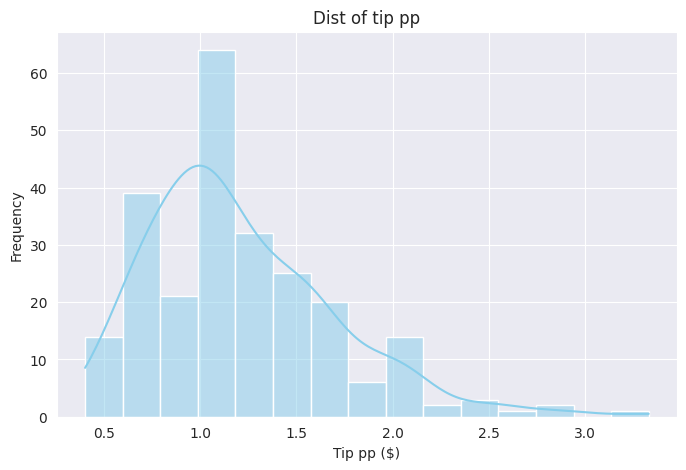

In [15]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,5))
sns.histplot(df['avg_tip_pp'], bins=15, kde = True, color ='skyblue')
plt.title('Dist of tip pp')
plt.xlabel('Tip pp ($)')
plt.ylabel('Frequency')
plt.show()



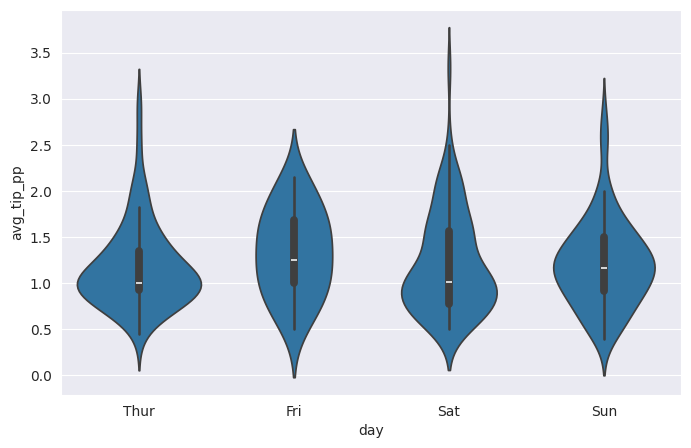

In [17]:
plt.figure(figsize=(8,5))
sns.violinplot(x = 'day', y = 'avg_tip_pp', data = df)
plt.show()


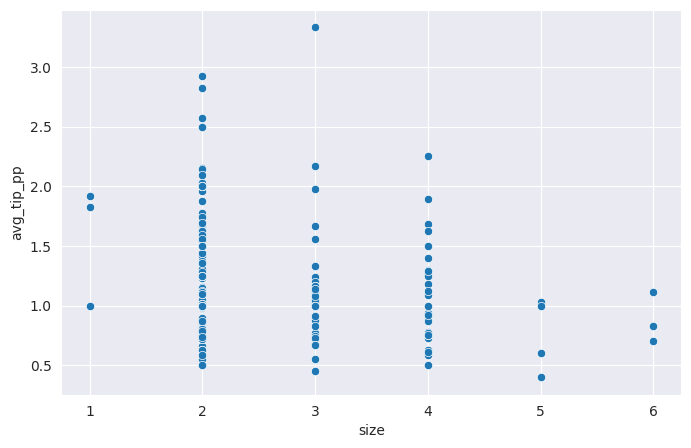

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'size', y = 'avg_tip_pp', data = df)
plt.show()

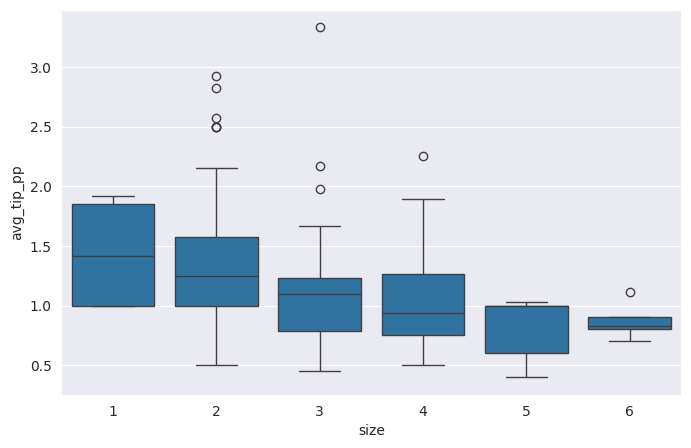

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'size', y = 'avg_tip_pp', data = df)
plt.show()

<ipython-input-24-02605208e1c8>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')


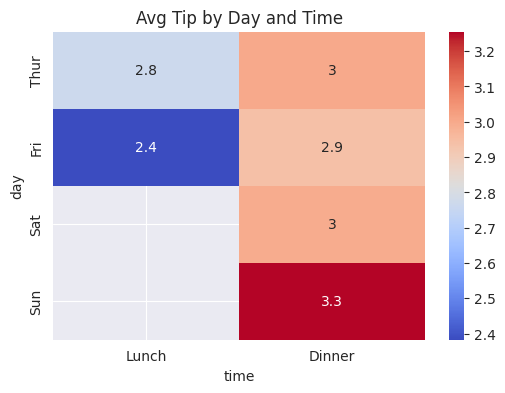

In [24]:
# Create pivot table
pivot = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Avg Tip by Day and Time')
plt.show()


# DASHBOARD -----------------------------------------------------------------------------

In [30]:
total_tips = df['tip'].sum()
avg_tip_pp = df['avg_tip_pp'].mean()
best_day = df.groupby(['day', 'time'])['tip'].mean().idxmax()

print("💰 Total Tips Collected:", round(total_tips, 2))
print("👥 Avg Tip per Person:", round(avg_tip_pp, 2))
print("🏆 Best Tipping Slot:", best_day[0], best_day[1])


💰 Total Tips Collected: 731.58
👥 Avg Tip per Person: 1.21
🏆 Best Tipping Slot: Sun Dinner


<ipython-input-30-d3770bd8a06d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_day = df.groupby(['day', 'time'])['tip'].mean().idxmax()


In [32]:
import plotly.express as px

day_avg = df.groupby('day')['tip'].mean().reset_index()

fig1 = px.bar(
    day_avg,
    x='day',
    y='tip',
    title='Average Tip by Day',
    labels={'tip': 'Avg Tip ($)', 'day': 'Day of Week'},
    color='tip',
    text='tip'
)
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig1.update_layout(template='plotly_white')
fig1.show()


<ipython-input-32-9bb22bb4189c>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [33]:
fig2 = px.scatter(
    df,
    x='size',
    y='tip',
    color='day',
    title='Tip Amount by Party Size',
    size='tip',
    hover_data=['total_bill', 'time']
)
fig2.update_layout(template='plotly_dark')
fig2.show()


In [35]:
fig3 = px.box(
    df,
    x='day',
    y='avg_tip_pp',
    color='day',
    title='Tip per Person by Day',
    points='all'
)
fig3.update_layout(template='plotly_white')
fig3.show()


In [36]:
pivot_df = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean').reset_index().melt(id_vars='day')

fig4 = px.density_heatmap(
    pivot_df,
    x='time',
    y='day',
    z='value',
    color_continuous_scale='RdBu',
    title='Average Tip by Day and Time'
)
fig4.update_layout(template='plotly_dark')
fig4.show()


<ipython-input-36-58d817d39a62>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [37]:
import plotly.io as pio

# Save any figure to HTML
pio.write_html(fig1, file='avg_tip_by_day.html', auto_open=True)
pio.write_html(fig2, file='tip_vs_party_size.html', auto_open=True)
pio.write_html(fig3, file='tip_per_person_box.html', auto_open=True)
pio.write_html(fig4, file='tip_day_time_heatmap.html', auto_open=True)
